In [318]:
import pandas as pd
import numpy as np
from datetime import timedelta, date, datetime
import datetime
import collections
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE

In [319]:
df = pd.read_excel(r'D:\Application process tasks\Air Up\Sample_Data.xlsx', sheet_name = "Sheet1")
df

,campaign,campaign_status,category,content,Country,country_shortname,coupon_code,date,id,influencer_name,...,NR/1000 Views,Orders,se_posts,"""Select Metric by CPM","CPR & CPI""",Select Metric by NR_User_Net Reach,sessions,Total Costs,Total NR,User
0,l-de-n-ig-florian.thiele_official_21032,done,family,NaN,Germany,DE,NaN,21/03/2021,DE20213_24,florian.thiele_official,...,NaN,NaN,NaN,"""1.800","00 €""","""231","60 €""",NaN,NaN,6
1,l-de-n-ig-isabeau_2103-2,done,family,worldwaterday,Germany,DE,NaN,20/03/2021,DE20213_12,isabeau_youtube,...,NaN,NaN,NaN,"""4.168","00 €""","""2.609","01 €""",NaN,NaN,59
2,l-de-n-ig-derceddo_2103-2,done,entertainment,worldwaterday,Germany,DE,NaN,20/03/2021,DE20213_70,derceddo,...,NaN,NaN,"""1.200","00 €""","""310","72 €""",NaN,NaN,7,0
3,l-de-n-ig-saskiabeecks_21032,done,sports,NaN,Germany,DE,NaN,19/03/2021,DE20213_7,saskiabeecks,...,NaN,NaN,NaN,"""3.333","33 €""","""448","55 €""",NaN,NaN,11
4,undefined,done,family,NaN,Germany,DE,NaN,19/03/2021,DE20213_196,hellomel_,...,NaN,NaN,NaN,0,NaN,NaN,NaN,"""0","00 €""","""0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,undefined,done,family,product_explanation,France,FR,MUMANDTWIN,07/10/2020,FR202010_63,mum_and_twin,...,"""504","62""","""670","92""","""1.044","00 €""",NaN,"""960","11 €""",50
2889,undefined,done,lifestyle,product_explanation,France,FR,MADEMOISELLE,31/10/2020,FR202010_146,mademoisellemodeuse,...,"""111","43""","""313","20 €""",NaN,"""78","00 €""",6,NaN,0
2890,undefined,done,family,product_explanation,France,FR,passionnementfolie15,28/10/2020,FR202010_138,passionnement_a_la_folie,...,"62""","""78","63""","""563","76 €""",NaN,"""55","62 €""",29,NaN
2891,undefined,done,family,product_explanation,France,FR,perfectday15,29/10/2020,FR202010_143,this_perfectday,...,"""89","43""","""125","15""","""553","32 €""",NaN,"""164","75 €""",31


<AxesSubplot:>

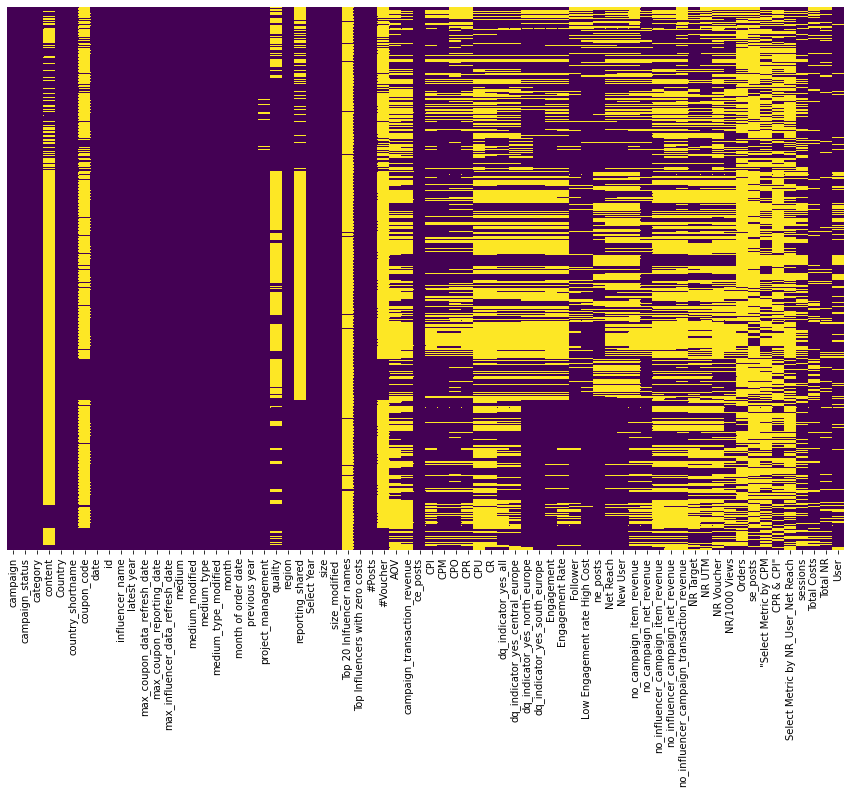

In [320]:
sns.heatmap(df.isnull(),yticklabels = False,cbar=False,cmap='viridis')

In [321]:
df_main = df[['id','category', 'Country', 'medium', 'NR/1000 Views', 'AOV','Total Costs', 'CPI', 'CPU', 'CR', 'Engagement Rate', 'CPO', 'CPM', 'Total NR']]
df_main

,id,category,Country,medium,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Total NR
0,DE20213_24,family,Germany,instagram,NaN,"""38",NaN,"97""","""225","00""","01%""",NaN,0,NaN
1,DE20213_12,family,Germany,instagram,NaN,"""44",NaN,"85""","""52","98""","59%""",NaN,0,NaN
2,DE20213_70,entertainment,Germany,instagram,NaN,"""44",NaN,0,"57""","""2",NaN,NaN,NaN,7
3,DE20213_7,sports,Germany,instagram,NaN,"""40",NaN,"88""","""227","27""","07%""",NaN,0,NaN
4,DE20213_196,family,Germany,instagram,NaN,NaN,"""0",NaN,NaN,NaN,NaN,NaN,NaN,"00 €"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,FR202010_63,family,France,instagram,"""504",NaN,"""960","""0",NaN,"""0",0,"""26","20""","11 €"""
2889,FR202010_146,lifestyle,France,instagram,"""111",NaN,6,"""0",NaN,"""2",0,"""12","40""",NaN
2890,FR202010_138,family,France,instagram,"62""",NaN,"62 €""","""4",NaN,"""5",0,"""146","47""",29
2891,FR202010_143,family,France,instagram,"""89",NaN,"""164","""2",NaN,"""1",0,"""51","66""","75 €"""


<AxesSubplot:>

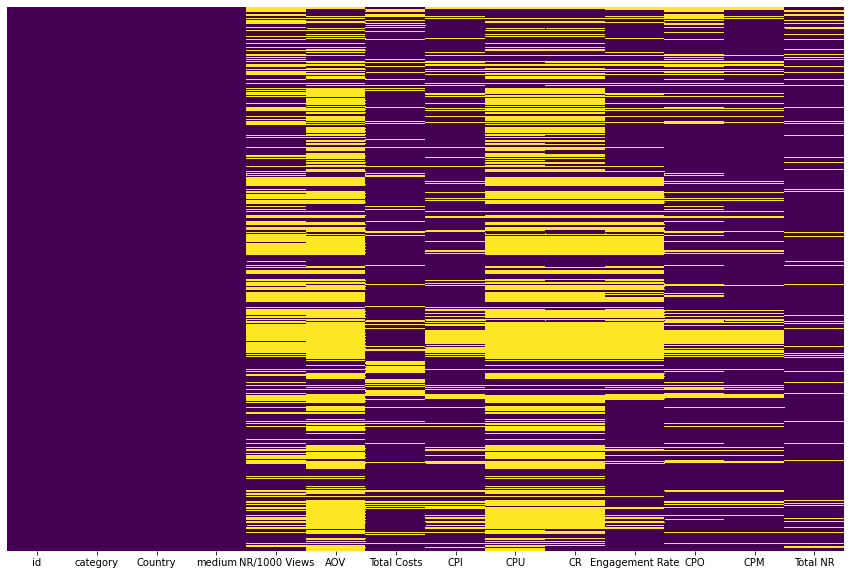

In [322]:
sns.heatmap(df_main.isnull(),yticklabels = False,cbar=False,cmap='viridis')

In [323]:
 df_main['category'].unique()

array(['family', 'entertainment', 'sports', 'lifestyle', 'music',
       'nutrition', 'beauty', 'sustainability', 'health', 'travel',
       'gaming', 'yoga', 'fashion', 'senior', 'sport', 'tech', 'fitness',
       'Sport', 'Fashion', 'Entertainment', 'business', 'food', 'style',
       'Beauty', 'diy', 'TV', 'travel ', 'photography'], dtype=object)

In [324]:
 df_main['Country'].unique()

array(['Germany', 'Switzerland', 'Austria', 'France', 'Netherlands'],
      dtype=object)

In [325]:
 df_main['medium'].unique()

array(['instagram', 'tiktok', 'youtube', 'instagram ', 'twitch',
       'snapchat', 'Blog', 'podcast', 'blog', 'pinterest'], dtype=object)

In [326]:
df_main["medium"].replace({"instagram ": "instagram","blog":"Blog"}, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [327]:
 df_main['medium'].unique()

array(['instagram', 'tiktok', 'youtube', 'twitch', 'snapchat', 'Blog',
       'podcast', 'pinterest'], dtype=object)

In [328]:
df_main.dtypes

id                 object
category           object
Country            object
medium             object
NR/1000 Views      object
AOV                object
Total Costs        object
CPI                object
CPU                object
CR                 object
Engagement Rate    object
CPO                object
CPM                object
Total NR           object
dtype: object

In [329]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2893 non-null   object
 1   category         2893 non-null   object
 2   Country          2893 non-null   object
 3   medium           2893 non-null   object
 4   NR/1000 Views    1628 non-null   object
 5   AOV              1193 non-null   object
 6   Total Costs      2444 non-null   object
 7   CPI              2261 non-null   object
 8   CPU              1254 non-null   object
 9   CR               1316 non-null   object
 10  Engagement Rate  1876 non-null   object
 11  CPO              2195 non-null   object
 12  CPM              2396 non-null   object
 13  Total NR         2593 non-null   object
dtypes: object(14)
memory usage: 316.5+ KB


In [330]:
df_main=df_main.replace({'"':'','€':'','%':''}, regex=True)
df_main

,id,category,Country,medium,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Total NR
0,DE20213_24,family,Germany,instagram,NaN,38,NaN,97,225,00,01,NaN,0,NaN
1,DE20213_12,family,Germany,instagram,NaN,44,NaN,85,52,98,59,NaN,0,NaN
2,DE20213_70,entertainment,Germany,instagram,NaN,44,NaN,0,57,2,NaN,NaN,NaN,7
3,DE20213_7,sports,Germany,instagram,NaN,40,NaN,88,227,27,07,NaN,0,NaN
4,DE20213_196,family,Germany,instagram,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,FR202010_63,family,France,instagram,504,NaN,960,0,NaN,0,0,26,20,11
2889,FR202010_146,lifestyle,France,instagram,111,NaN,6,0,NaN,2,0,12,40,NaN
2890,FR202010_138,family,France,instagram,62,NaN,62,4,NaN,5,0,146,47,29
2891,FR202010_143,family,France,instagram,89,NaN,164,2,NaN,1,0,51,66,75


In [331]:
df_main['NR/1000 Views'] = df_main['NR/1000 Views'].astype('float')
df_main['AOV'] = df_main['AOV'].astype('float')
df_main['Total Costs'] = df_main['Total Costs'].astype('float')
df_main['CPI'] = df_main['CPI'].astype('float')
df_main['CPU'] = df_main['CPU'].astype('float')
df_main['CR'] = df_main['CR'].astype('float')
df_main['Engagement Rate'] = df_main['Engagement Rate'].astype('float')
df_main['CPO'] = df_main['CPO'].astype('float')
df_main['CPM'] = df_main['CPM'].astype('float')
df_main['Total NR'] = df_main['Total NR'].astype('float')
df_main.head()

,id,category,Country,medium,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Total NR
0,DE20213_24,family,Germany,instagram,NaN,38.0,NaN,97.0,225.0,0.0,1.0,NaN,0.0,NaN
1,DE20213_12,family,Germany,instagram,NaN,44.0,NaN,85.0,52.0,98.0,59.0,NaN,0.0,NaN
2,DE20213_70,entertainment,Germany,instagram,NaN,44.0,NaN,0.0,57.0,2.0,NaN,NaN,NaN,7.0
3,DE20213_7,sports,Germany,instagram,NaN,40.0,NaN,88.0,227.0,27.0,7.0,NaN,0.0,NaN
4,DE20213_196,family,Germany,instagram,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [332]:
df_main.describe()

,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Total NR
count,1628.000000,1193.000000,2.444000e+03,2261.000000,1254.000000,1316.000000,1876.000000,2195.000000,2396.000000,2.593000e+03
mean,554.046931,38.800788,6.017883e+05,19.928350,38.343700,44.620726,38.316631,17.331670,16.962855,2.529498e+05
std,1474.120894,27.619801,2.126430e+07,38.603111,53.985136,35.729002,181.898304,39.768462,36.937354,1.189079e+07
min,0.000000,3.767000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,24.000000,27.000000,0.000000e+00,0.000000,21.000000,14.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,142.500000,35.000000,2.950000e+01,3.000000,29.000000,42.000000,17.000000,2.000000,0.000000,5.400000e+01
75%,466.000000,43.000000,9.725000e+01,27.000000,39.000000,70.250000,57.000000,26.000000,25.250000,3.430000e+02
max,28544.000000,511.000000,8.461538e+08,825.000000,725.000000,450.000000,6590.000000,964.000000,945.000000,6.032721e+08


<AxesSubplot:xlabel='Total Costs'>

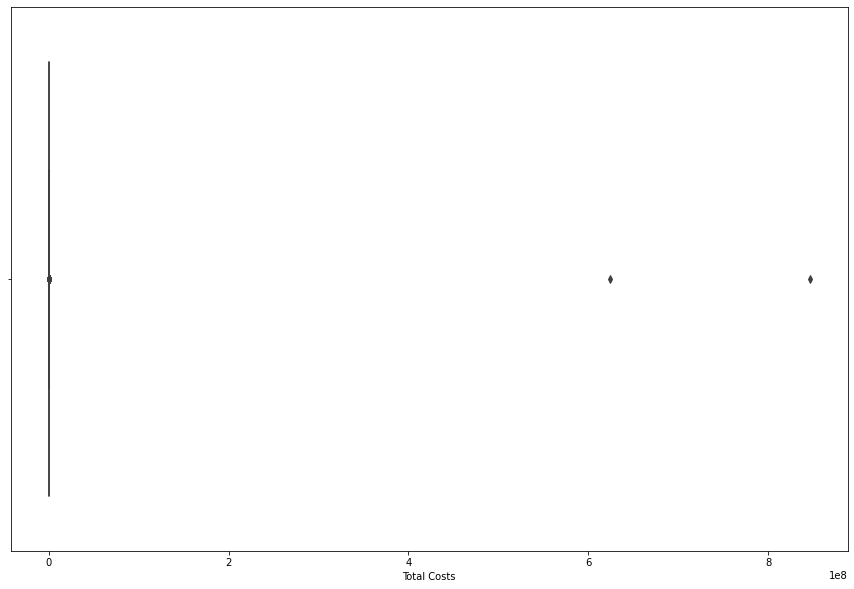

In [333]:
sns.boxplot(x=df_main['Total Costs'])

<AxesSubplot:xlabel='Total NR'>

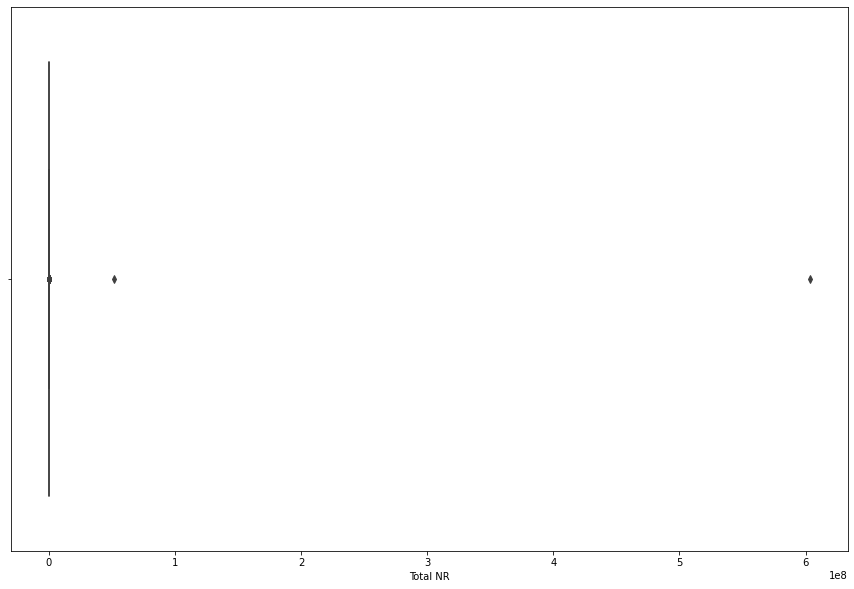

In [334]:
sns.boxplot(x=df_main['Total NR'])

In [335]:
Datas = df_main.copy()

# Dealing with Outliers

### Values within within +3 to -3 standard deviations in the column

In [336]:
datx= Datas[np.abs(Datas['Total Costs']-Datas['Total Costs'].mean()) <= (3*Datas['Total Costs'].std())]
datx= datx[np.abs(datx['Total NR']-datx['Total NR'].mean()) <= (3*datx['Total NR'].std())]
#datx= datx[np.abs(datx['Engagement Rate']-datx['Engagement Rate'].mean()) <= (3*datx['Engagement Rate'].std())]
datx

,id,category,Country,medium,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Total NR
4,DE20213_196,family,Germany,instagram,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
5,DE20213_71,family,Germany,instagram,2.0,53.000,40.0,24.0,1.0,64.0,77.0,NaN,0.0,21.852
8,DE20213_195,lifestyle,Germany,tiktok,NaN,NaN,2.6,NaN,NaN,NaN,NaN,NaN,NaN,0.000
9,DE20213_173,sports,Germany,instagram,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
13,DE20213_127,lifestyle,Germany,instagram,96.0,4.573,0.0,96.0,45.0,83.0,44.0,NaN,0.0,488.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,FR202010_131,family,France,instagram,76.0,NaN,105.0,1.0,NaN,3.0,0.0,44.0,37.0,63.000
2888,FR202010_63,family,France,instagram,504.0,NaN,960.0,0.0,NaN,0.0,0.0,26.0,20.0,11.000
2890,FR202010_138,family,France,instagram,62.0,NaN,62.0,4.0,NaN,5.0,0.0,146.0,47.0,29.000
2891,FR202010_143,family,France,instagram,89.0,NaN,164.0,2.0,NaN,1.0,0.0,51.0,66.0,75.000


In [337]:
Exp_Data = datx.copy()

In [338]:
datx.describe()

,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Total NR
count,1366.000000,886.000000,2288.000000,1832.000000,899.000000,962.000000,1436.000000,1876.000000,1911.000000,2288.000000
mean,591.915133,40.933792,199.887710,17.712882,31.276974,44.481289,40.416435,18.592225,19.751439,215.706847
std,1562.489651,30.936756,963.126941,39.565092,32.467905,31.145360,207.143619,41.525758,36.135224,286.521482
min,0.000000,3.767000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.250000,28.000000,0.000000,0.000000,21.000000,16.000000,0.000000,0.000000,0.000000,1.000000
50%,160.000000,36.000000,33.000000,2.000000,28.000000,43.000000,15.000000,5.000000,2.000000,64.000000
75%,500.000000,44.000000,105.250000,16.000000,36.000000,71.000000,57.000000,28.000000,32.000000,364.000000
max,28544.000000,511.000000,23901.000000,825.000000,635.000000,182.000000,6590.000000,964.000000,945.000000,998.000000


### Filtering by quantile

In [339]:
# Filter by quantile
q_low_cost = Datas["Total Costs"].quantile(0.01)
q_hi_cost  = Datas["Total Costs"].quantile(0.99)

q_low_nr = Datas["Total NR"].quantile(0.01)
q_hi_nr  = Datas["Total NR"].quantile(0.99)

df_filtered = Datas[(Datas["Total Costs"] < q_hi_cost) & (Datas["Total Costs"] > q_low_cost)]
df_filtered = Datas[(Datas["Total NR"] < q_hi_nr) & (Datas["Total NR"] > q_low_nr)]
df_filtered

,id,category,Country,medium,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Total NR
2,DE20213_70,entertainment,Germany,instagram,NaN,44.000,NaN,0.0,57.0,2.0,NaN,NaN,NaN,7.000
5,DE20213_71,family,Germany,instagram,2.0,53.000,40.0,24.0,1.0,64.0,77.0,NaN,0.0,21.852
13,DE20213_127,lifestyle,Germany,instagram,96.0,4.573,0.0,96.0,45.0,83.0,44.0,NaN,0.0,488.000
14,DE20213_138,lifestyle,Germany,instagram,NaN,47.000,NaN,0.0,68.0,1.0,NaN,NaN,NaN,9.000
18,DE20213_47,sports,Germany,instagram,47.0,80.000,48.0,88.0,26.0,5.0,47.0,NaN,0.0,637.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,FR202010_131,family,France,instagram,76.0,NaN,105.0,1.0,NaN,3.0,0.0,44.0,37.0,63.000
2888,FR202010_63,family,France,instagram,504.0,NaN,960.0,0.0,NaN,0.0,0.0,26.0,20.0,11.000
2890,FR202010_138,family,France,instagram,62.0,NaN,62.0,4.0,NaN,5.0,0.0,146.0,47.0,29.000
2891,FR202010_143,family,France,instagram,89.0,NaN,164.0,2.0,NaN,1.0,0.0,51.0,66.0,75.000


In [340]:
df_filtered.describe()

,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Total NR
count,1481.000000,1039.000000,1696.000000,1773.000000,1076.000000,1134.000000,1446.000000,1772.000000,1833.000000,1896.000000
mean,597.084131,38.698114,255.452253,20.988720,32.643123,45.466490,33.628631,16.518067,15.968358,267.219127
std,1537.082143,29.010992,1109.948506,34.991032,38.897348,35.729866,36.199520,42.058039,34.849068,287.022589
min,0.000000,3.767000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,39.000000,26.000000,20.000000,0.000000,21.000000,16.000000,0.000000,0.000000,0.000000,35.000000
50%,164.000000,34.000000,50.000000,5.000000,28.000000,43.000000,27.000000,1.000000,0.000000,126.000000
75%,500.000000,42.000000,199.000000,35.000000,36.000000,71.000000,61.750000,25.000000,24.000000,474.000000
max,28544.000000,511.000000,23901.000000,825.000000,725.000000,450.000000,635.000000,964.000000,945.000000,963.000000


# Dealing with Null values

In [341]:
datx['NR/1000 Views']=datx['NR/1000 Views'].fillna(datx['NR/1000 Views'].mean())
datx['AOV']=datx['AOV'].fillna(datx['AOV'].mean())
datx['Total Costs']=datx['Total Costs'].fillna(datx['Total Costs'].mean())
datx['CPI']=datx['CPI'].fillna(datx['CPI'].mean())
datx['CPU']=datx['CPU'].fillna(datx['CPU'].mean())
datx['CR']=datx['CR'].fillna(datx['CR'].mean())
datx['Engagement Rate']=datx['Engagement Rate'].fillna(datx['Engagement Rate'].mean())
datx['CPO']=datx['CPO'].fillna(datx['CPO'].mean())
datx['CPM']=datx['CPM'].fillna(datx['CPM'].mean())
datx['Total NR']=datx['Total NR'].fillna(datx['Total NR'].mean())
datx.head()

,id,category,Country,medium,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Total NR
4,DE20213_196,family,Germany,instagram,591.915133,40.933792,0.0,17.712882,31.276974,44.481289,40.416435,18.592225,19.751439,0.000
5,DE20213_71,family,Germany,instagram,2.000000,53.000000,40.0,24.000000,1.000000,64.000000,77.000000,18.592225,0.000000,21.852
8,DE20213_195,lifestyle,Germany,tiktok,591.915133,40.933792,2.6,17.712882,31.276974,44.481289,40.416435,18.592225,19.751439,0.000
9,DE20213_173,sports,Germany,instagram,591.915133,40.933792,0.0,17.712882,31.276974,44.481289,40.416435,18.592225,19.751439,0.000
13,DE20213_127,lifestyle,Germany,instagram,96.000000,4.573000,0.0,96.000000,45.000000,83.000000,44.000000,18.592225,0.000000,488.000


In [342]:
datx=datx.reset_index(drop=True)
datx

,id,category,Country,medium,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Total NR
0,DE20213_196,family,Germany,instagram,591.915133,40.933792,0.0,17.712882,31.276974,44.481289,40.416435,18.592225,19.751439,0.000
1,DE20213_71,family,Germany,instagram,2.000000,53.000000,40.0,24.000000,1.000000,64.000000,77.000000,18.592225,0.000000,21.852
2,DE20213_195,lifestyle,Germany,tiktok,591.915133,40.933792,2.6,17.712882,31.276974,44.481289,40.416435,18.592225,19.751439,0.000
3,DE20213_173,sports,Germany,instagram,591.915133,40.933792,0.0,17.712882,31.276974,44.481289,40.416435,18.592225,19.751439,0.000
4,DE20213_127,lifestyle,Germany,instagram,96.000000,4.573000,0.0,96.000000,45.000000,83.000000,44.000000,18.592225,0.000000,488.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,FR202010_131,family,France,instagram,76.000000,40.933792,105.0,1.000000,31.276974,3.000000,0.000000,44.000000,37.000000,63.000
2284,FR202010_63,family,France,instagram,504.000000,40.933792,960.0,0.000000,31.276974,0.000000,0.000000,26.000000,20.000000,11.000
2285,FR202010_138,family,France,instagram,62.000000,40.933792,62.0,4.000000,31.276974,5.000000,0.000000,146.000000,47.000000,29.000
2286,FR202010_143,family,France,instagram,89.000000,40.933792,164.0,2.000000,31.276974,1.000000,0.000000,51.000000,66.000000,75.000


In [343]:
datx.drop(['id'],axis=1,inplace=True)


In [344]:
datx.shape

(2288, 13)

# One hot encoding

In [345]:
columns=['category','Country','medium']

In [346]:
def onehot_encoder(coll,data):
    df_final=data
    i=0
    for fields in coll:
        
        print(fields)
        df1=pd.get_dummies(data[fields],drop_first=True)
        
        data.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([data,df_final],axis=1)
        
    return df_final

In [347]:
final_df=onehot_encoder(columns,datx)

category
Country
medium


In [348]:
final_df

,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Total NR,...,France,Germany,Netherlands,Switzerland,instagram,pinterest,snapchat,tiktok,twitch,youtube
0,591.915133,40.933792,0.0,17.712882,31.276974,44.481289,40.416435,18.592225,19.751439,0.000,...,0,1,0,0,1,0,0,0,0,0
1,2.000000,53.000000,40.0,24.000000,1.000000,64.000000,77.000000,18.592225,0.000000,21.852,...,0,1,0,0,1,0,0,0,0,0
2,591.915133,40.933792,2.6,17.712882,31.276974,44.481289,40.416435,18.592225,19.751439,0.000,...,0,1,0,0,0,0,0,1,0,0
3,591.915133,40.933792,0.0,17.712882,31.276974,44.481289,40.416435,18.592225,19.751439,0.000,...,0,1,0,0,1,0,0,0,0,0
4,96.000000,4.573000,0.0,96.000000,45.000000,83.000000,44.000000,18.592225,0.000000,488.000,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,76.000000,40.933792,105.0,1.000000,31.276974,3.000000,0.000000,44.000000,37.000000,63.000,...,1,0,0,0,1,0,0,0,0,0
2284,504.000000,40.933792,960.0,0.000000,31.276974,0.000000,0.000000,26.000000,20.000000,11.000,...,1,0,0,0,1,0,0,0,0,0
2285,62.000000,40.933792,62.0,4.000000,31.276974,5.000000,0.000000,146.000000,47.000000,29.000,...,1,0,0,0,1,0,0,0,0,0
2286,89.000000,40.933792,164.0,2.000000,31.276974,1.000000,0.000000,51.000000,66.000000,75.000,...,1,0,0,0,1,0,0,0,0,0


In [349]:
df1 = final_df.pop('Total NR')
final_df['Total NR']=df1
final_df

,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Entertainment,...,Germany,Netherlands,Switzerland,instagram,pinterest,snapchat,tiktok,twitch,youtube,Total NR
0,591.915133,40.933792,0.0,17.712882,31.276974,44.481289,40.416435,18.592225,19.751439,0,...,1,0,0,1,0,0,0,0,0,0.000
1,2.000000,53.000000,40.0,24.000000,1.000000,64.000000,77.000000,18.592225,0.000000,0,...,1,0,0,1,0,0,0,0,0,21.852
2,591.915133,40.933792,2.6,17.712882,31.276974,44.481289,40.416435,18.592225,19.751439,0,...,1,0,0,0,0,0,1,0,0,0.000
3,591.915133,40.933792,0.0,17.712882,31.276974,44.481289,40.416435,18.592225,19.751439,0,...,1,0,0,1,0,0,0,0,0,0.000
4,96.000000,4.573000,0.0,96.000000,45.000000,83.000000,44.000000,18.592225,0.000000,0,...,1,0,0,1,0,0,0,0,0,488.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,76.000000,40.933792,105.0,1.000000,31.276974,3.000000,0.000000,44.000000,37.000000,0,...,0,0,0,1,0,0,0,0,0,63.000
2284,504.000000,40.933792,960.0,0.000000,31.276974,0.000000,0.000000,26.000000,20.000000,0,...,0,0,0,1,0,0,0,0,0,11.000
2285,62.000000,40.933792,62.0,4.000000,31.276974,5.000000,0.000000,146.000000,47.000000,0,...,0,0,0,1,0,0,0,0,0,29.000
2286,89.000000,40.933792,164.0,2.000000,31.276974,1.000000,0.000000,51.000000,66.000000,0,...,0,0,0,1,0,0,0,0,0,75.000


In [350]:
final_df['Engagement Rate'] = final_df['Engagement Rate'] / 100
final_df

,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Entertainment,...,Germany,Netherlands,Switzerland,instagram,pinterest,snapchat,tiktok,twitch,youtube,Total NR
0,591.915133,40.933792,0.0,17.712882,31.276974,44.481289,0.404164,18.592225,19.751439,0,...,1,0,0,1,0,0,0,0,0,0.000
1,2.000000,53.000000,40.0,24.000000,1.000000,64.000000,0.770000,18.592225,0.000000,0,...,1,0,0,1,0,0,0,0,0,21.852
2,591.915133,40.933792,2.6,17.712882,31.276974,44.481289,0.404164,18.592225,19.751439,0,...,1,0,0,0,0,0,1,0,0,0.000
3,591.915133,40.933792,0.0,17.712882,31.276974,44.481289,0.404164,18.592225,19.751439,0,...,1,0,0,1,0,0,0,0,0,0.000
4,96.000000,4.573000,0.0,96.000000,45.000000,83.000000,0.440000,18.592225,0.000000,0,...,1,0,0,1,0,0,0,0,0,488.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2283,76.000000,40.933792,105.0,1.000000,31.276974,3.000000,0.000000,44.000000,37.000000,0,...,0,0,0,1,0,0,0,0,0,63.000
2284,504.000000,40.933792,960.0,0.000000,31.276974,0.000000,0.000000,26.000000,20.000000,0,...,0,0,0,1,0,0,0,0,0,11.000
2285,62.000000,40.933792,62.0,4.000000,31.276974,5.000000,0.000000,146.000000,47.000000,0,...,0,0,0,1,0,0,0,0,0,29.000
2286,89.000000,40.933792,164.0,2.000000,31.276974,1.000000,0.000000,51.000000,66.000000,0,...,0,0,0,1,0,0,0,0,0,75.000


In [370]:
final_df.head()

,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Entertainment,...,Germany,Netherlands,Switzerland,instagram,pinterest,snapchat,tiktok,twitch,youtube,Total NR
0,591.915133,40.933792,0.0,17.712882,31.276974,44.481289,0.404164,18.592225,19.751439,0,...,1,0,0,1,0,0,0,0,0,0.000
1,2.000000,53.000000,40.0,24.000000,1.000000,64.000000,0.770000,18.592225,0.000000,0,...,1,0,0,1,0,0,0,0,0,21.852
2,591.915133,40.933792,2.6,17.712882,31.276974,44.481289,0.404164,18.592225,19.751439,0,...,1,0,0,0,0,0,1,0,0,0.000
3,591.915133,40.933792,0.0,17.712882,31.276974,44.481289,0.404164,18.592225,19.751439,0,...,1,0,0,1,0,0,0,0,0,0.000
4,96.000000,4.573000,0.0,96.000000,45.000000,83.000000,0.440000,18.592225,0.000000,0,...,1,0,0,1,0,0,0,0,0,488.000


# Data scaling

In [374]:
# recaling the variables (both)
df_columns = final_df.columns
scaler = MinMaxScaler()
final_df = scaler.fit_transform(final_df)

# rename columns (since now its an np array)
final_df = pd.DataFrame(final_df)
final_df.columns = df_columns

final_df.head()

,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Entertainment,...,Germany,Netherlands,Switzerland,instagram,pinterest,snapchat,tiktok,twitch,youtube,Total NR
0,0.020737,0.073274,0.000000,0.021470,0.049255,0.244403,0.006133,0.019287,0.020901,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.000070,0.097062,0.001674,0.029091,0.001575,0.351648,0.011684,0.019287,0.000000,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.021896
2,0.020737,0.073274,0.000109,0.021470,0.049255,0.244403,0.006133,0.019287,0.020901,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
3,0.020737,0.073274,0.000000,0.021470,0.049255,0.244403,0.006133,0.019287,0.020901,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.003363,0.001589,0.000000,0.116364,0.070866,0.456044,0.006677,0.019287,0.000000,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.488978


In [375]:
train, test = train_test_split(final_df, test_size=0.1)

In [376]:
train= train.reset_index(drop=True)
train

,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Entertainment,...,Germany,Netherlands,Switzerland,instagram,pinterest,snapchat,tiktok,twitch,youtube,Total NR
0,0.020737,0.073274,0.000000,0.021470,0.049255,0.244403,0.006133,0.019287,0.020901,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.020737,0.073274,0.000059,0.021470,0.049255,0.244403,0.006133,0.019287,0.020901,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.012192,0.073274,0.000460,0.000000,0.049255,0.244403,0.000000,0.011411,0.006349,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.973948
3,0.020737,0.073274,0.000000,0.000000,0.049255,0.244403,0.000000,0.016598,0.038095,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.000385,0.101005,0.000000,0.009697,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.055110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,0.020737,0.073274,0.000000,0.021470,0.049255,0.244403,0.006133,0.019287,0.020901,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
2055,0.020737,0.073274,0.000000,0.000000,0.049255,0.244403,0.015478,0.019287,0.000000,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
2056,0.014048,0.039889,0.003054,0.008485,0.034646,0.489011,0.011988,0.000000,0.000000,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.090180
2057,0.008478,0.037917,0.025313,0.043636,0.064567,0.280220,0.015023,0.001037,0.000000,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.023046


In [377]:
test= test.reset_index(drop=True)

In [382]:
X=train.drop(['Total NR'],axis=1)
Y=train['Total NR']

In [383]:
X_validation=test.drop(['Total NR'],axis=1)
Y_validation=test['Total NR']

# Functions for model training and testing

In [379]:
def model_training(x, y, model):
    rmse = []
    skf = KFold(n_splits=10, random_state = None)
    skf.get_n_splits(x,y)
    
    for train_index, test_index in skf.split(x,y):
        print("Train",train_index,"Validation", test_index)
        X_train,X_test = x.iloc[train_index], x.iloc[test_index]
        Y_train,Y_test = y.iloc[train_index], y.iloc[test_index]
        
    model.fit(X_train,Y_train)
    prediction = model.predict(X_test)
    mse = mean_squared_error(Y_test,prediction)
    score= np.sqrt(mse)
    rmse.append(score)
    Rmse = np.array(rmse).mean()
    return Rmse

In [380]:
def calc_val_error(X_test, y_test, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse

# XGBoost regressor

In [381]:
import xgboost
regressor=xgboost.XGBRegressor()

In [386]:
xg_rmse_tr= model_training(X,Y,regressor)
xg_rmse_tr

Train [ 206  207  208 ... 2056 2057 2058] Validation [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205]
Train [   0    1    2 ... 2056 2057 2058] Validation [206 207 208 209 210 211 212 213 214 215 216 217 218 219 

0.19210977925437764

In [387]:
rmse_xg_val = calc_train_error(X_validation,Y_validation,regressor)
rmse_xg_val

0.057715975857900455

# Linear Regression

In [388]:
lr = linear_model.LinearRegression()

In [389]:
lr_rmse_tr= model_training(X,Y,lr)
lr_rmse_tr

Train [ 206  207  208 ... 2056 2057 2058] Validation [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205]
Train [   0    1    2 ... 2056 2057 2058] Validation [206 207 208 209 210 211 212 213 214 215 216 217 218 219 

0.24669432428016164

In [390]:
rmse_lr_val = calc_train_error(X_validation,Y_validation,lr)
rmse_lr_val

0.074031932363228

# SVM

In [391]:
from sklearn.svm import SVR
svm = SVR(kernel='rbf')

In [392]:
svm_rmse_tr= model_training(X,Y,svm)
svm_rmse_tr

Train [ 206  207  208 ... 2056 2057 2058] Validation [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205]
Train [   0    1    2 ... 2056 2057 2058] Validation [206 207 208 209 210 211 212 213 214 215 216 217 218 219 

0.24802878574130965

In [397]:
rmse_svm_val = calc_train_error(X_validation,Y_validation,svm)
rmse_svm_val

0.06691906686619868

# Random Forest

In [394]:
from sklearn.ensemble import RandomForestRegressor

In [395]:
rf = RandomForestRegressor()

In [396]:
rf_rmse_tr= model_training(X,Y,rf)
rf_rmse_tr

Train [ 206  207  208 ... 2056 2057 2058] Validation [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205]
Train [   0    1    2 ... 2056 2057 2058] Validation [206 207 208 209 210 211 212 213 214 215 216 217 218 219 

0.18759117377951673

In [398]:
rmse_rf_val = calc_train_error(X_validation,Y_validation,rf)
rmse_rf_val

0.048731105760968806

# Hyperparameter for XGboost

In [399]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [400]:
from sklearn.model_selection import RandomizedSearchCV
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [401]:
random_cv.fit(X,Y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   45.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  1.8min finished


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimators=100, n_jobs=12,
                                          num_pa...
                                          validate_parameters=1,
                                          verbosity=None),
                   n_it

In [402]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=15,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=1500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [407]:
xgb_reg=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [409]:
xgb_reg=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.15, max_delta_step=0, max_depth=15,
             min_child_weight=2, missing=None, monotone_constraints='()',
             n_estimators=1500, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [410]:
xgb_hp_tr = model_training(X,Y,xgb_reg)
xgb_hp_tr

Train [ 206  207  208 ... 2056 2057 2058] Validation [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205]
Train [   0    1    2 ... 2056 2057 2058] Validation [206 207 208 209 210 211 212 213 214 215 216 217 218 219 

0.20166367978356656

In [412]:
rmse_xghp = calc_train_error(X_validation,Y_validation,xgb_reg)
rmse_xghp

0.06074059642175717

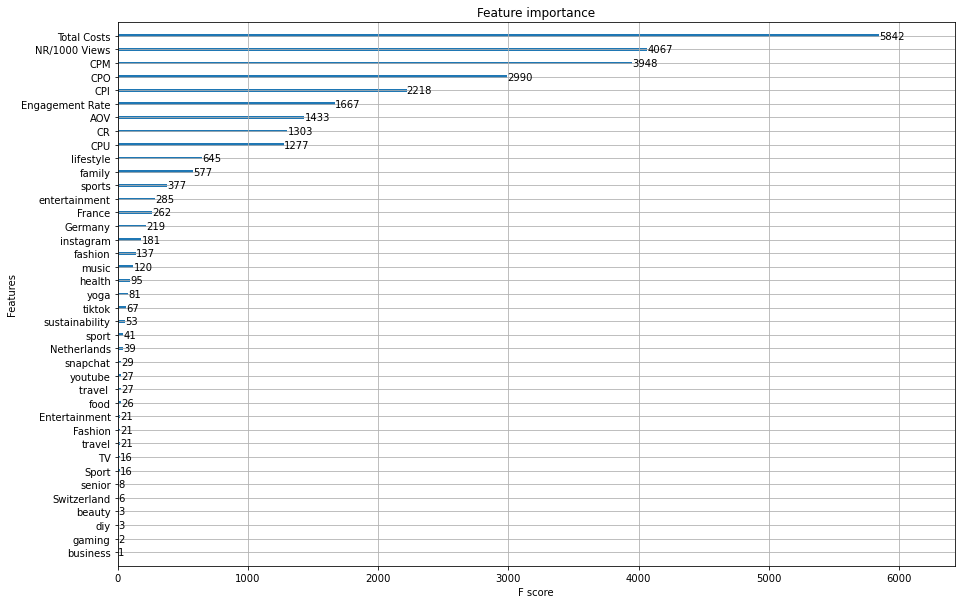

In [413]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)
plot_importance(xgb_reg)
plt.show()

# 6

In [266]:
df_main

,id,category,Country,medium,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Total NR
0,DE20213_24,family,Germany,instagram,NaN,38.0,NaN,97.0,225.0,0.0,1.0,NaN,0.0,NaN
1,DE20213_12,family,Germany,instagram,NaN,44.0,NaN,85.0,52.0,98.0,59.0,NaN,0.0,NaN
2,DE20213_70,entertainment,Germany,instagram,NaN,44.0,NaN,0.0,57.0,2.0,NaN,NaN,NaN,7.0
3,DE20213_7,sports,Germany,instagram,NaN,40.0,NaN,88.0,227.0,27.0,7.0,NaN,0.0,NaN
4,DE20213_196,family,Germany,instagram,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2888,FR202010_63,family,France,instagram,504.0,NaN,960.0,0.0,NaN,0.0,0.0,26.0,20.0,11.0
2889,FR202010_146,lifestyle,France,instagram,111.0,NaN,6.0,0.0,NaN,2.0,0.0,12.0,40.0,NaN
2890,FR202010_138,family,France,instagram,62.0,NaN,62.0,4.0,NaN,5.0,0.0,146.0,47.0,29.0
2891,FR202010_143,family,France,instagram,89.0,NaN,164.0,2.0,NaN,1.0,0.0,51.0,66.0,75.0


In [267]:
datx

,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Total NR
0,591.915133,40.933792,0.0,17.712882,31.276974,44.481289,40.416435,18.592225,19.751439,0.000
1,2.000000,53.000000,40.0,24.000000,1.000000,64.000000,77.000000,18.592225,0.000000,21.852
2,591.915133,40.933792,2.6,17.712882,31.276974,44.481289,40.416435,18.592225,19.751439,0.000
3,591.915133,40.933792,0.0,17.712882,31.276974,44.481289,40.416435,18.592225,19.751439,0.000
4,96.000000,4.573000,0.0,96.000000,45.000000,83.000000,44.000000,18.592225,0.000000,488.000
...,...,...,...,...,...,...,...,...,...,...
2283,76.000000,40.933792,105.0,1.000000,31.276974,3.000000,0.000000,44.000000,37.000000,63.000
2284,504.000000,40.933792,960.0,0.000000,31.276974,0.000000,0.000000,26.000000,20.000000,11.000
2285,62.000000,40.933792,62.0,4.000000,31.276974,5.000000,0.000000,146.000000,47.000000,29.000
2286,89.000000,40.933792,164.0,2.000000,31.276974,1.000000,0.000000,51.000000,66.000000,75.000


In [295]:
Exp_Data

,id,category,Country,medium,NR/1000 Views,AOV,Total Costs,CPI,CPU,CR,Engagement Rate,CPO,CPM,Total NR
4,DE20213_196,family,Germany,instagram,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
5,DE20213_71,family,Germany,instagram,2.0,53.000,40.0,24.0,1.0,64.0,77.0,NaN,0.0,21.852
8,DE20213_195,lifestyle,Germany,tiktok,NaN,NaN,2.6,NaN,NaN,NaN,NaN,NaN,NaN,0.000
9,DE20213_173,sports,Germany,instagram,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.000
13,DE20213_127,lifestyle,Germany,instagram,96.0,4.573,0.0,96.0,45.0,83.0,44.0,NaN,0.0,488.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2887,FR202010_131,family,France,instagram,76.0,NaN,105.0,1.0,NaN,3.0,0.0,44.0,37.0,63.000
2888,FR202010_63,family,France,instagram,504.0,NaN,960.0,0.0,NaN,0.0,0.0,26.0,20.0,11.000
2890,FR202010_138,family,France,instagram,62.0,NaN,62.0,4.0,NaN,5.0,0.0,146.0,47.0,29.000
2891,FR202010_143,family,France,instagram,89.0,NaN,164.0,2.0,NaN,1.0,0.0,51.0,66.0,75.000


In [305]:
sum_df_med = Exp_Data.groupby(['Country','medium']).agg({'Total NR': 'sum', 'Total Costs': 'sum'})

sum_df_med

Total NR  Total Costs
Country     medium                            
Austria     Blog            0.000        0.000
            instagram   21870.945    41193.257
France      instagram  100929.000    53005.468
            snapchat     1280.000     1500.000
            tiktok       1946.000     2551.000
            youtube      3091.000      540.380
Germany     Blog            0.000      600.000
            instagram  315453.219   334122.559
            pinterest       0.000        0.000
            tiktok      41295.569    13650.425
            twitch        576.910     1543.430
            youtube      2302.821      849.000
Netherlands instagram    4555.000     5709.562
            tiktok          0.000        0.000
            youtube       177.000      717.000
Switzerland instagram      59.802     1361.000

In [303]:
sum_df_country = Exp_Data.groupby(['Country']).agg({'Total NR': 'sum', 'Total Costs': 'sum'})
sum_df_country

,Total NR,Total Costs
Country,,
Austria,21870.945,41193.257
France,107246.000,57596.848
Germany,359628.519,350765.414
Netherlands,4732.000,6426.562
Switzerland,59.802,1361.000


<ipython-input-309-838e4afe99a0>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (Exp_Data.groupby(['Country'])['Total NR', 'Total Costs'].sum().plot.bar())


<AxesSubplot:xlabel='Country'>

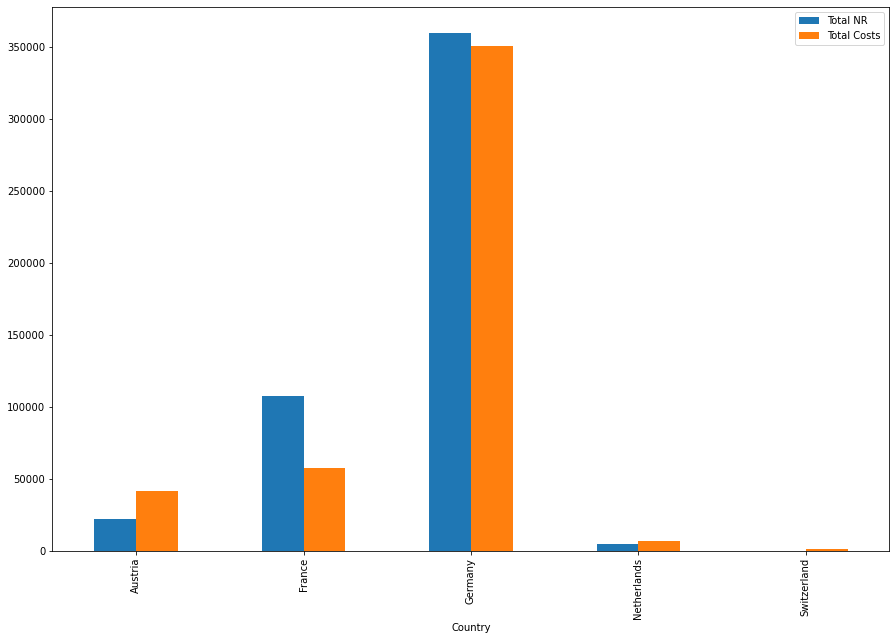

In [309]:
(Exp_Data.groupby(['Country'])['Total NR', 'Total Costs'].sum().plot.bar())

<ipython-input-310-3ff1e5aa94e4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (Exp_Data.groupby(['medium'])['Total NR', 'Total Costs'].sum().plot.bar())


<AxesSubplot:xlabel='medium'>

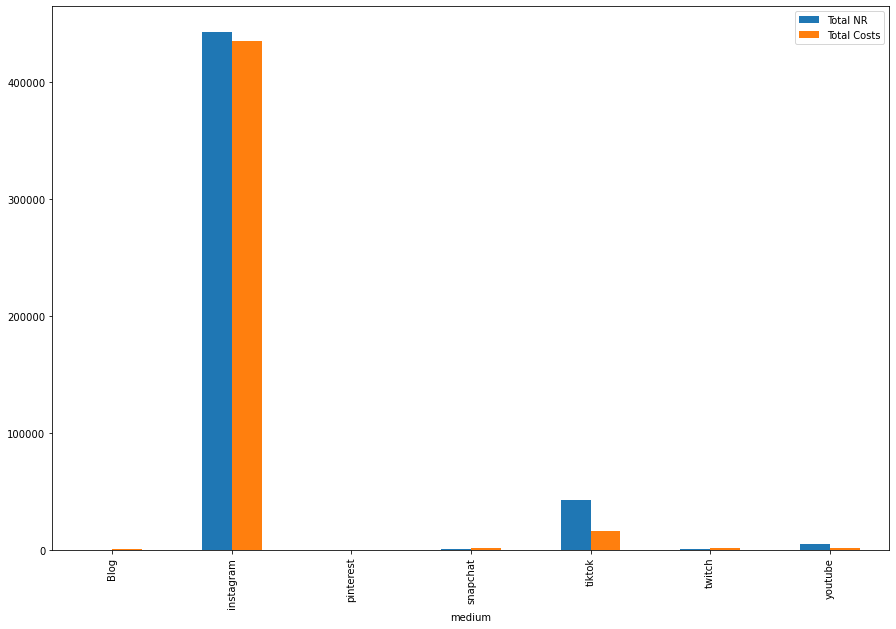

In [310]:
(Exp_Data.groupby(['medium'])['Total NR', 'Total Costs'].sum().plot.bar())

<ipython-input-308-ae7ac3a2a2cf>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (Exp_Data.groupby(['Country','medium'])['Total NR', 'Total Costs'].sum().plot.bar())


<AxesSubplot:xlabel='Country,medium'>

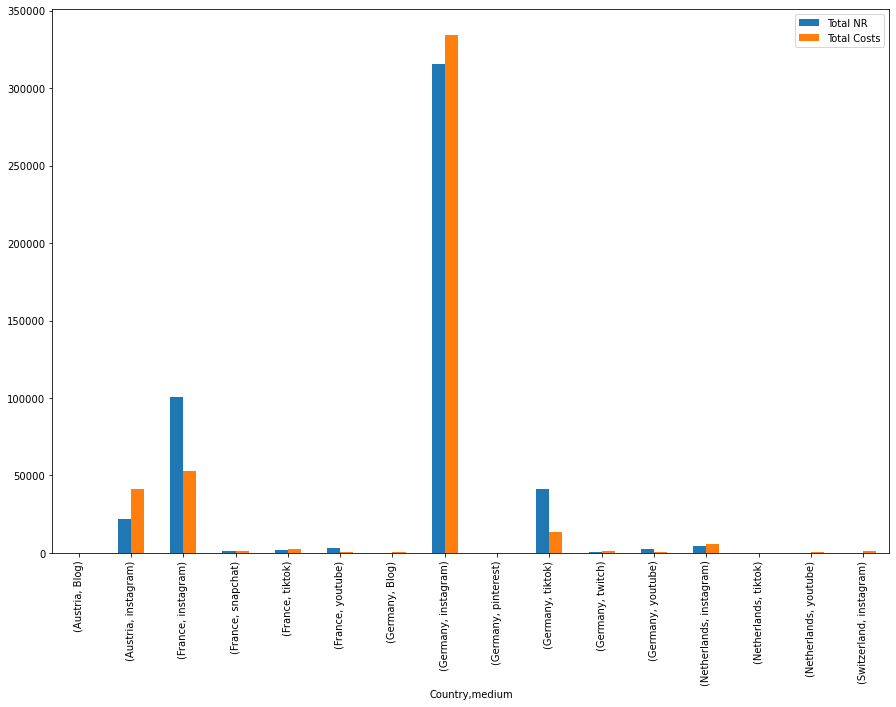

In [308]:
(Exp_Data.groupby(['Country','medium'])['Total NR', 'Total Costs'].sum().plot.bar())

<ipython-input-311-69e402738a0d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (Exp_Data.groupby(['category'])['Total NR', 'Total Costs'].sum().plot.bar())


<AxesSubplot:xlabel='category'>

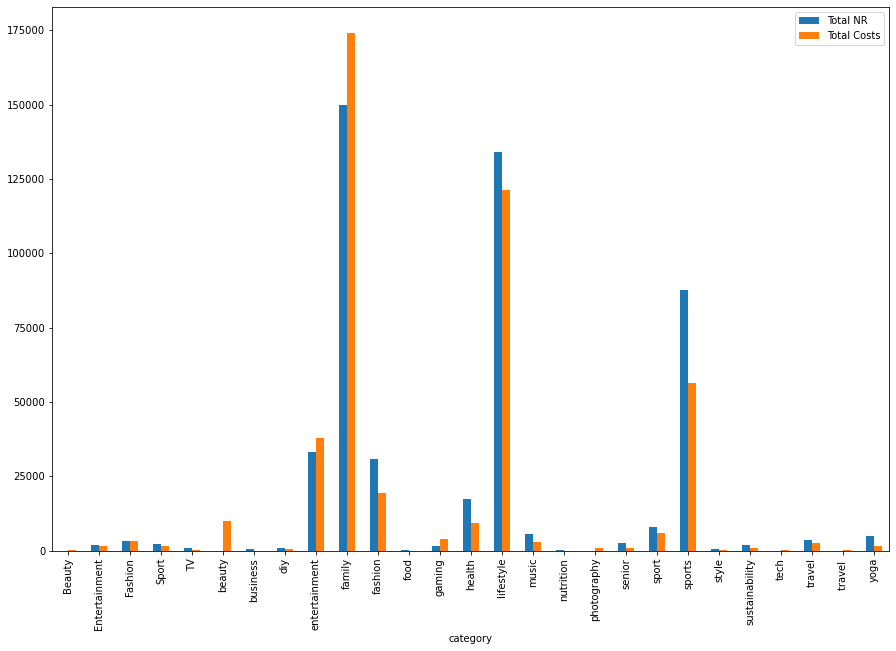

In [311]:
(Exp_Data.groupby(['category'])['Total NR', 'Total Costs'].sum().plot.bar())

<ipython-input-312-51804ecc7a1f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (Exp_Data.groupby(['Country','category'])['Total NR', 'Total Costs'].sum().plot.bar())


<AxesSubplot:xlabel='Country,category'>

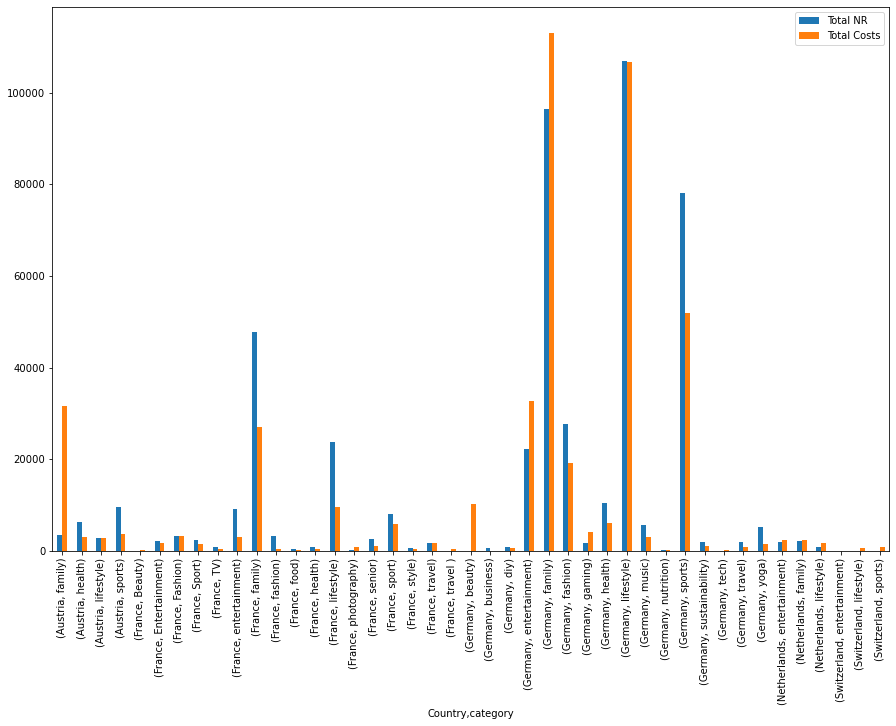

In [312]:
(Exp_Data.groupby(['Country','category'])['Total NR', 'Total Costs'].sum().plot.bar())

<ipython-input-316-91765b40c612>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (Exp_Data.groupby(['Country'])['CPM', 'NR/1000 Views'].mean().plot.bar())


<AxesSubplot:xlabel='Country'>

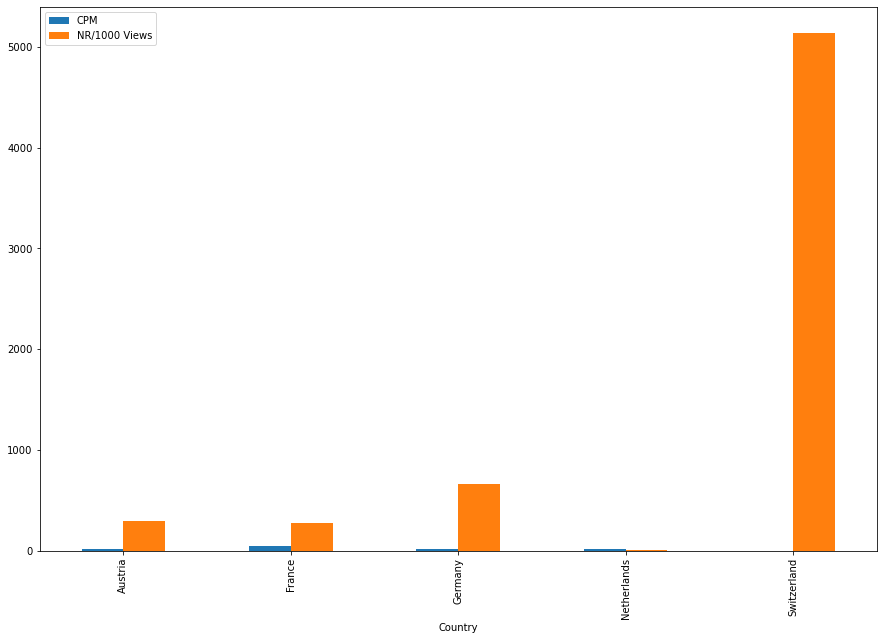

In [316]:
(Exp_Data.groupby(['Country'])['CPM', 'NR/1000 Views'].mean().plot.bar())

<ipython-input-317-c44595402b5e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (Exp_Data.groupby(['medium'])['CPM', 'NR/1000 Views'].mean().plot.bar())


<AxesSubplot:xlabel='medium'>

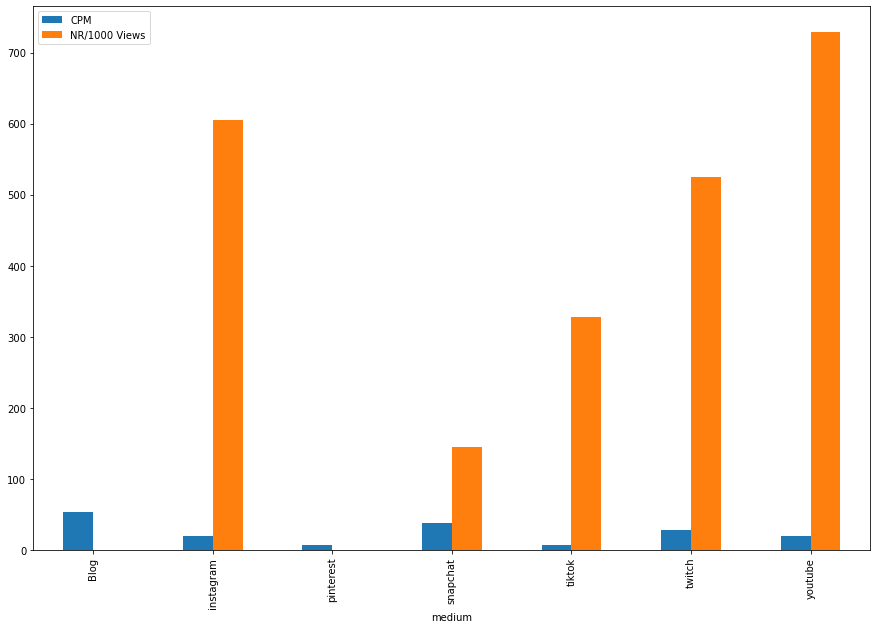

In [317]:
(Exp_Data.groupby(['medium'])['CPM', 'NR/1000 Views'].mean().plot.bar())